# AAI614: Data Science & its Applications

*Notebook 5.4: Experiment with KNN*

<a href="https://colab.research.google.com/github/jadgeitani/AAI614_Geitani/blob/week5/JadGeitani_Notebook5.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Example I: Classifying Social Networks Ads

## Importing the libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [17]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

dataset = pd.read_csv('https://raw.githubusercontent.com/harmanani/AAI614/main/Week%205/Social_Network_Ads.csv')

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fitting K-NN to the Training set

Use the KNN model for training by specifying the input and output variables of the training set as follows.  Note that *p =2* refers to **euclidean distance**.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [6]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

# Example II: Classifying Digits

In [8]:
from sklearn import metrics

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
# Train the model using the training sets
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [10]:
digits = load_digits()
# Train the model using the training sets
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [11]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
#Predict Output
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model.predict(x_test))
score = model.score(x_test, y_test)

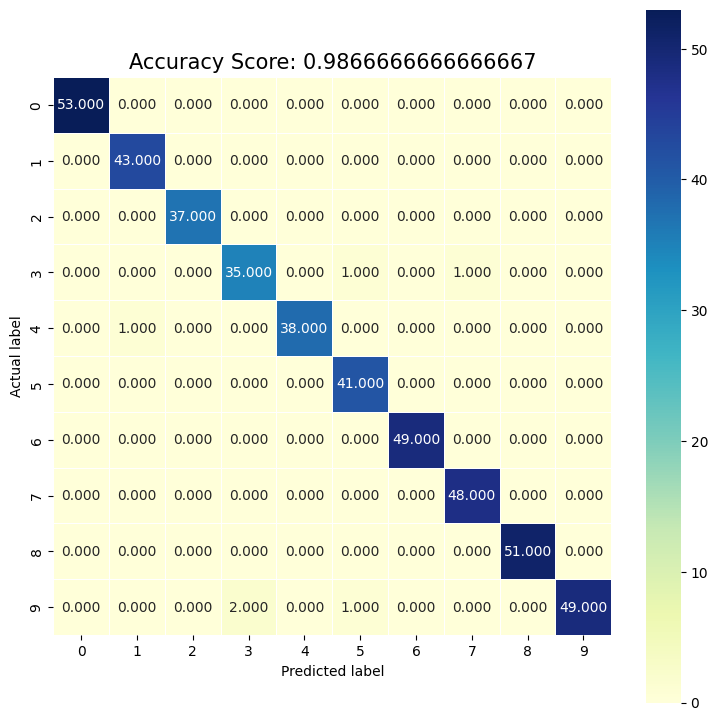

In [13]:
import seaborn as sns 
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5,square = True, cmap = 'YlGnBu')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [8]:
#WHO Suicide dataset
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://raw.githubusercontent.com/jadgeitani/AAI614_Geitani/week5/who_suicide_statistics.csv'
dataset = pd.read_csv(url)

print(dataset.head())

dataset['sex'] = dataset['sex'].map({'male': 0, 'female': 1})  # Encode 'sex' column
dataset['age'] = dataset['age'].map({
    '5-14 years': 0, '15-24 years': 1, '25-34 years': 2, 
    '35-54 years': 3, '55-74 years': 4, '75+ years': 5
})

X = dataset[['year', 'sex', 'age', 'population']].values
y = dataset['suicides_no'].values

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


   country  year     sex          age  suicides_no  population
0  Albania  1985  female  15-24 years          NaN    277900.0
1  Albania  1985  female  25-34 years          NaN    246800.0
2  Albania  1985  female  35-54 years          NaN    267500.0
3  Albania  1985  female   5-14 years          NaN    298300.0
4  Albania  1985  female  55-74 years          NaN    138700.0
Shape of X: (43776, 4)
Shape of y: (43776,)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
import numpy as np
import pandas as pd

print("NaN in X_train:", np.isnan(X_train).sum())
print("NaN in y_train:", np.isnan(y_train).sum())
print("Infinite in X_train:", np.isinf(X_train).sum())
print("Infinite in y_train:", np.isinf(y_train).sum())


NaN in X_train: 4063
NaN in y_train: 1697
Infinite in X_train: 0
Infinite in y_train: 0


In [12]:
mask = ~np.isnan(X_train).any(axis=1) & ~np.isinf(X_train).any(axis=1)
X_train = X_train[mask]
y_train = y_train[mask]
mask = ~np.isnan(y_train)
X_train = X_train[mask]
y_train = y_train[mask]


In [13]:
X_train = X_train.astype(float)
y_train = y_train.astype(float)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
mask = ~np.isnan(X_test).any(axis=1) & ~np.isinf(X_test).any(axis=1)
X_test = X_test[mask]
y_test = y_test[mask]
mask = ~np.isnan(y_test)
X_test = X_test[mask]
y_test = y_test[mask]

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1182,  130,   56, ...,    0,    0,    0],
       [ 328,   63,   43, ...,    0,    0,    0],
       [ 177,   55,   40, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int64)

In [19]:
from sklearn import metrics

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
# Train the model using the training sets
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [21]:
digits = load_digits()
# Train the model using the training sets
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [22]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
#Predict Output
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model.predict(x_test))
score = model.score(x_test, y_test)

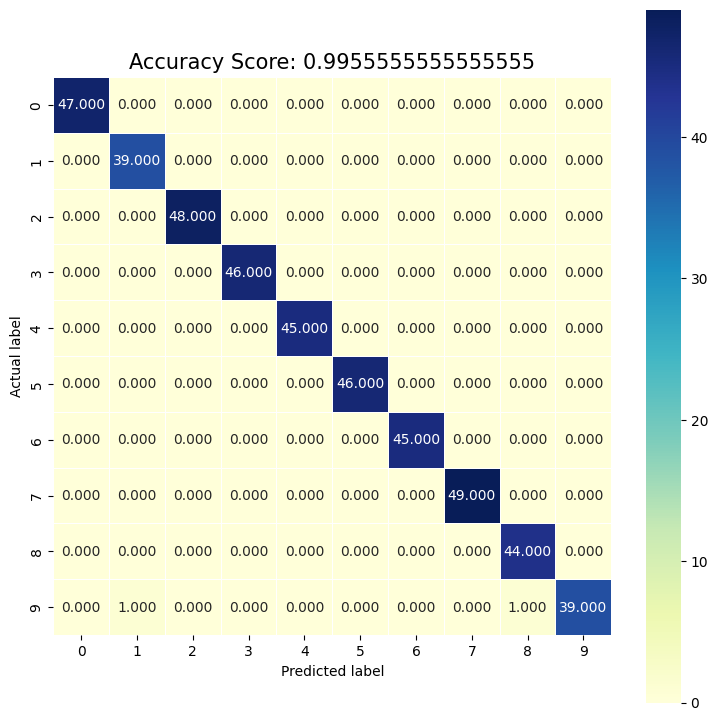

In [26]:
import seaborn as sns 
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5,square = True, cmap = 'YlGnBu')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);